# Linear Regression in statsmodels
- Amber Kutscher
- Data Enrichment

## Imports

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline

np.random.seed(321)

## Prepare the Data

In [2]:
# Load Data
df = pd.read_csv("Data/CarPrice_Assignment.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [3]:
# Checking for null values
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

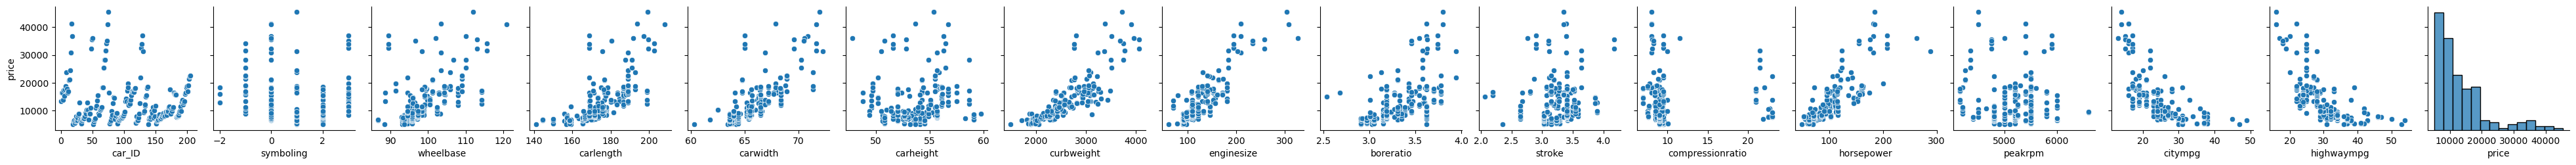

In [4]:
# Quick EDA for cols related to target (target = 'price')
sns.pairplot(df, y_vars='price');

In [5]:
# Make x and y variables
y = df['price'].copy()
X = df.drop(columns=['price']).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=321)
X_train.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
17,18,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,...,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20
39,40,0,honda prelude,gas,std,four,sedan,fwd,front,96.5,...,four,110,1bbl,3.15,3.58,9.0,86,5800,27,33
40,41,0,honda accord,gas,std,four,sedan,fwd,front,96.5,...,four,110,1bbl,3.15,3.58,9.0,86,5800,27,33
47,48,0,jaguar xj,gas,std,four,sedan,rwd,front,113.0,...,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19
123,124,-1,plymouth valiant,gas,std,four,wagon,fwd,front,103.3,...,four,122,2bbl,3.35,3.46,8.5,88,5000,24,30


## Pipelines

In [6]:
# Make cat selector and use it to save a list of cat column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [7]:
len(cat_cols)

10

In [8]:
# Make num selector and use it to save a list of num column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [9]:
len(num_cols)

15

In [10]:
# Make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                      fill_value='MISSING'),
                        OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
preprocessor = make_column_transformer((cat_pipe, cat_cols), 
                                       (num_pipe, num_cols),
                                       remainder='passthrough')

## Remaking the DataFrame after ColumnTransformer

In [11]:
# Fit the col transformer
preprocessor.fit(X_train)

C:\Users\amber\anaconda3\envs\dojo-env\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['CarName', 'fueltype', 'aspiration',
                                  'doornumber', 'carbody', 'drivewheel',
                                  'enginelocation', 'enginetype',
                                  'cylindernumber', 'fuelsystem']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['car_ID', 'symboling', 'wheelbase',
                                  'carlength', 'carwidth', 'carheight',
                                  'curbweight', 'enginesize', 'boreratio',
                                  'stroke', 'compressionratio', 'horsepower',
                                  'peakrpm', 'citympg', 'highwaympg'])])

In [12]:
# Explore output of the transformation as a df
pd.DataFrame(preprocessor.transform(X_train).round(3))

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.078,1.856,1.946,1.104,0.376,-0.546,2.025,0.558,-1.533,-1.518
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.192,-0.489,-0.390,-0.678,0.992,-0.308,-0.461,1.363,0.259,0.318
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.192,-0.357,-0.390,-0.678,0.992,-0.308,-0.461,1.363,0.259,0.318
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.331,2.951,3.102,1.142,2.906,-0.523,1.870,-0.752,-1.533,-1.659
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.487,-0.038,-0.107,0.081,0.603,-0.427,-0.410,-0.248,-0.189,-0.105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.756,0.776,0.341,1.711,-0.402,-0.190,0.264,0.558,-0.339,-0.388
149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.192,-0.175,-0.390,-0.678,0.992,-0.308,-0.073,1.363,-0.189,-0.388
150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.136,-1.436,-0.815,-1.588,0.441,-0.261,-0.721,1.766,0.856,1.025
151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.378,0.514,0.695,0.990,1.901,-0.784,1.067,-0.248,-0.936,-0.953


## Getting Feature Names

In [13]:
# Create an empty list of feature names
final_features = []

### Categorical Feature Names

In [14]:
# Finding the categorical pipeline in our col transformer
preprocessor.named_transformers_['pipeline-1']

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False,
                               sparse_output=False))])

In [15]:
# Using named steps dictionary to find the encoder - Part 1
preprocessor.named_transformers_['pipeline-1'].named_steps

{'simpleimputer': SimpleImputer(fill_value='MISSING', strategy='constant'),
 'onehotencoder': OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)}

In [16]:
# Using named steps dictionary to find the encoder - Part 2
ohe_step = preprocessor.named_transformers_['pipeline-1'].named_steps['onehotencoder']

In [17]:
# Get OHE feature names
cat_features = ohe_step.get_feature_names_out(cat_cols)
cat_features

array(['CarName_alfa-romero giulia', 'CarName_alfa-romero stelvio',
       'CarName_audi 100 ls', 'CarName_audi 100ls', 'CarName_audi 5000',
       'CarName_audi 5000s (diesel)', 'CarName_audi fox',
       'CarName_bmw 320i', 'CarName_bmw x1', 'CarName_bmw x3',
       'CarName_bmw x5', 'CarName_bmw z4', 'CarName_buick century',
       'CarName_buick century luxus (sw)',
       'CarName_buick century special', 'CarName_buick opel isuzu deluxe',
       'CarName_buick regal sport coupe (turbo)', 'CarName_buick skylark',
       'CarName_chevrolet impala', 'CarName_chevrolet monte carlo',
       'CarName_chevrolet vega 2300', 'CarName_dodge challenger se',
       'CarName_dodge colt (sw)', 'CarName_dodge coronet custom',
       'CarName_dodge coronet custom (sw)', 'CarName_dodge d200',
       'CarName_dodge rampage', 'CarName_honda accord',
       'CarName_honda accord cvcc', 'CarName_honda civic',
       'CarName_honda civic (auto)', 'CarName_honda civic 1300',
       'CarName_honda civic 

In [18]:
# Add categorical feature names to our final_features list
final_features.extend(cat_features)
final_features

['CarName_alfa-romero giulia',
 'CarName_alfa-romero stelvio',
 'CarName_audi 100 ls',
 'CarName_audi 100ls',
 'CarName_audi 5000',
 'CarName_audi 5000s (diesel)',
 'CarName_audi fox',
 'CarName_bmw 320i',
 'CarName_bmw x1',
 'CarName_bmw x3',
 'CarName_bmw x5',
 'CarName_bmw z4',
 'CarName_buick century',
 'CarName_buick century luxus (sw)',
 'CarName_buick century special',
 'CarName_buick opel isuzu deluxe',
 'CarName_buick regal sport coupe (turbo)',
 'CarName_buick skylark',
 'CarName_chevrolet impala',
 'CarName_chevrolet monte carlo',
 'CarName_chevrolet vega 2300',
 'CarName_dodge challenger se',
 'CarName_dodge colt (sw)',
 'CarName_dodge coronet custom',
 'CarName_dodge coronet custom (sw)',
 'CarName_dodge d200',
 'CarName_dodge rampage',
 'CarName_honda accord',
 'CarName_honda accord cvcc',
 'CarName_honda civic',
 'CarName_honda civic (auto)',
 'CarName_honda civic 1300',
 'CarName_honda civic 1500 gl',
 'CarName_honda civic cvcc',
 'CarName_honda prelude',
 'CarName_isuz

### Numerical Feature Names

In [19]:
# Confirm list of numeric features
num_cols

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [20]:
# Add the numeric features which were passed through the model
final_features.extend(num_cols)
final_features

['CarName_alfa-romero giulia',
 'CarName_alfa-romero stelvio',
 'CarName_audi 100 ls',
 'CarName_audi 100ls',
 'CarName_audi 5000',
 'CarName_audi 5000s (diesel)',
 'CarName_audi fox',
 'CarName_bmw 320i',
 'CarName_bmw x1',
 'CarName_bmw x3',
 'CarName_bmw x5',
 'CarName_bmw z4',
 'CarName_buick century',
 'CarName_buick century luxus (sw)',
 'CarName_buick century special',
 'CarName_buick opel isuzu deluxe',
 'CarName_buick regal sport coupe (turbo)',
 'CarName_buick skylark',
 'CarName_chevrolet impala',
 'CarName_chevrolet monte carlo',
 'CarName_chevrolet vega 2300',
 'CarName_dodge challenger se',
 'CarName_dodge colt (sw)',
 'CarName_dodge coronet custom',
 'CarName_dodge coronet custom (sw)',
 'CarName_dodge d200',
 'CarName_dodge rampage',
 'CarName_honda accord',
 'CarName_honda accord cvcc',
 'CarName_honda civic',
 'CarName_honda civic (auto)',
 'CarName_honda civic 1300',
 'CarName_honda civic 1500 gl',
 'CarName_honda civic cvcc',
 'CarName_honda prelude',
 'CarName_isuz

## Transforming X_train and X_test & Remaking DataFrames

In [21]:
# Transform X_train
X_train_df = pd.DataFrame(preprocessor.transform(X_train), columns=final_features,
                         index=X_train.index)
X_train_df.head()

,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.078184,1.855775,1.945552,1.104185,0.376132,-0.546313,2.025098,0.557617,-1.532551,-1.517697
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.192373,-0.489363,-0.390498,-0.677725,0.992489,-0.308461,-0.461496,1.363430,0.258514,0.318495
40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.192373,-0.356583,-0.390498,-0.677725,0.992489,-0.308461,-0.461496,1.363430,0.258514,0.318495
47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.331061,2.951215,3.101778,1.142097,2.906440,-0.522527,1.869686,-0.751829,-1.532551,-1.658942
123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.487430,-0.038300,-0.107341,0.080534,0.603211,-0.427387,-0.409692,-0.248196,-0.189252,-0.105242


In [22]:
# Transform X_test
X_test_df = pd.DataFrame(preprocessor.transform(X_test), columns=final_features,
                        index=X_test.index)
X_test_df.head()

,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.331061,2.951215,3.101778,1.142097,2.906440,-0.522527,1.869686,-0.751829,-1.532551,-1.658942
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.037920,0.742762,0.340992,1.710792,-0.402424,-0.189535,0.263760,0.557617,-0.189252,-0.387733
148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.514486,-0.262855,-0.437691,1.104185,-2.056855,-0.308461,-0.565104,-0.651102,-0.338507,-0.246487
53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.192373,-1.190367,-0.838831,-1.132681,-0.402424,-0.308461,-0.927733,-0.248196,0.855536,1.024722
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.433958,-0.450310,-0.154534,0.004708,0.635651,-0.427387,-0.176574,0.154711,0.258514,0.459740


## Adding a Constant

In [23]:
# Standard Statsmodels Import
import statsmodels.api as sm

In [24]:
# Overwrite our X dataframes to include the constant
X_train_df = sm.add_constant(X_train_df, has_constant='add', prepend=False)
X_test_df = sm.add_constant(X_test_df, has_constant='add', prepend=False)
display(X_train_df.head(2), X_test_df.head(2))

,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,const
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.855775,1.945552,1.104185,0.376132,-0.546313,2.025098,0.557617,-1.532551,-1.517697,1.0
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.489363,-0.390498,-0.677725,0.992489,-0.308461,-0.461496,1.363430,0.258514,0.318495,1.0


,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,const
48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.951215,3.101778,1.142097,2.906440,-0.522527,1.869686,-0.751829,-1.532551,-1.658942,1.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.742762,0.340992,1.710792,-0.402424,-0.189535,0.263760,0.557617,-0.189252,-0.387733,1.0


## Fit to a LinearRegression in sklearn

In [25]:
# LinearRegression import
from sklearn.linear_model import LinearRegression

In [26]:
# Instantiate the model
model = LinearRegression(fit_intercept=False)

In [27]:
# Fit the model
model.fit(X_train_df, y_train)

LinearRegression(fit_intercept=False)

In [28]:
# Define predictions
train_preds = model.predict(X_train_df)
test_preds = model.predict(X_test_df)

In [29]:
# Import metrics
from sklearn.metrics import r2_score, mean_squared_error
# Find r-square
print('Training r2:', r2_score(y_train, train_preds))
print('Testing r2:', r2_score(y_test, test_preds))
# Find mse
print('Training MSE:', mean_squared_error(y_train, train_preds))
print('Testing MSE:', mean_squared_error(y_test, test_preds))

Training r2: 0.9992662555474178
Testing r2: -0.14593316429349246
Training MSE: 43207.13108310185
Testing MSE: 87664932.73288837


## Fitting an OLS in statsmodels

In [30]:
# Instantiate an OLS model with the training data
model = sm.OLS(y_train, X_train_df, hasconst=True)

In [31]:
# Fitting the model and saving the result as a new var
result = model.fit()

In [32]:
# Get model performance metrics
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     65.75
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           3.04e-06
Time:                        22:05:30   Log-Likelihood:                -1033.6
No. Observations:                 153   AIC:                             2359.
Df Residuals:                       7   BIC:                             2802.
Df Model:                         145                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
CarName_alfa-romero giulia               2624.6105   8791.359      0.299      0.774   -1.82e+04    2.34e+04
CarName_alfa-romero stelvio              5602.9150   8681.425      0.645      0.539   -1.49e+04    2.61e+04
CarName_audi 100 ls                      4935.0408    1.2e+04      0.413      0.692   -2.33e+04    3.32e+04
CarName_audi 100ls                      -4899.0854   8124.540     -0.603      0.566   -2.41e+04    1.43e+04
CarName_audi 5000                        1853.2394   5826.819      0.318      0.760   -1.19e+04    1.56e+04
CarName_audi 5000s (diesel)             -3971.7227   6803.341     -0.584      0.578   -2.01e+04    1.21e+04
CarName_audi fox                         1950.4632   5491.551      0.355      0.733    -1.1e+04    1.49e+04
CarName_bmw 320i                         8518.6392   1.02e+04      0.832      0.433   -1.57e+04    3.27e+04
CarName_bmw x1                           2.387e+04   1.13e+04      2.121      0.072   -2745.642    5.05e+04
CarName_bmw x3                           2.107e+04   1.12e+04      1.878      0.102   -5459.151    4.76e+04
CarName_bmw x5                            3.17e+04   1.08e+04      2.940      0.022    6204.912    5.72e+04
CarName_bmw z4                           2.023e+04   1.16e+04      1.742      0.125   -7225.887    4.77e+04
CarName_buick century                    5943.6753   4011.097      1.482      0.182   -3541.063    1.54e+04
CarName_buick century luxus (sw)         7347.6454   5112.602      1.437      0.194   -4741.737    1.94e+04
CarName_buick century special           -1002.2475   5484.231     -0.183      0.860    -1.4e+04     1.2e+04
CarName_buick opel isuzu deluxe         -5385.5854   3012.403     -1.788      0.117   -1.25e+04    1737.616
CarName_buick regal sport coupe (turbo)  7828.4801   3976.604      1.969      0.090   -1574.694    1.72e+04
CarName_buick skylark                   -4248.8318   3822.369     -1.112      0.303   -1.33e+04    4789.635
CarName_chevrolet impala                 4404.0924   3201.837      1.375      0.211   -3167.050     1.2e+04
CarName_chevrolet monte carlo            1190.6484   8383.961      0.142      0.891   -1.86e+04     2.1e+04
CarName_chevrolet vega 2300              -349.5750   8487.983     -0.041      0.968   -2.04e+04    1.97e+04
CarName_dodge challenger se              -644.9803   8500.716     -0.076      0.942   -2.07e+04    1.95e+04
CarName_dodge colt (sw)                 -3596.6061   8324.796     -0.432      0.679   -2.33e+04    1.61e+04
CarName_dodge coronet custom            -3534.6782   9085.386     -0.389      0.709    -2.5e+04    1.79e+04
CarName_dodge coronet custom (sw)       -2235.7083   4059.806     -0.551      0.599   -1.18e+04    7364.208
CarName_dodge d200                      -3045.1037   9367.6

In [33]:
# Use the result to .predict
test_preds = result.predict(X_test_df)

In [34]:
test_r2 = r2_score(y_test, test_preds)
test_mse = mean_squared_error(y_test, test_preds)

In [35]:
print(f'The testing r-square value is {test_r2} and the testing mean squared error is {test_mse}.')

The testing r-square value is -0.14593316429347092 and the testing mean squared error is 87664932.73288672.


In [36]:
# Making the print statement fancier
print(f'Our testing r-squared value is only displaying 2 decimal places and is {test_r2:.2f}.')
print(f'Our testing mean squared error is only displaying 2 decimal places and is {test_mse:.2f}.')

Our testing r-squared value is only displaying 2 decimal places and is -0.15.
Our testing mean squared error is only displaying 2 decimal places and is 87664932.73.


# Diagnosing Your Regression Model (Practice)


In [37]:
## Standard Statsmodels import
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
plt.rcParams['figure.facecolor'] = 'white'
plt.style.use(['seaborn-talk'])
# pd.set_option('display.max_columns',25)

C:\Users\amber\AppData\Local\Temp\ipykernel_12316\2090592943.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-talk'])


## Checking for the Assumption of Linearity

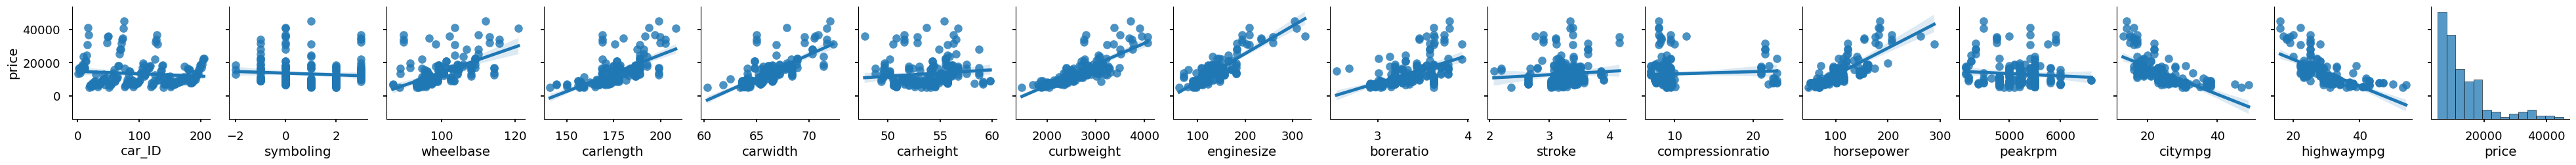

In [38]:
sns.pairplot(df, y_vars='price', kind='reg');

In [39]:
plot_kws = dict(line_kws={'color':'red', 'ls':'--'},
               scatter_kws={'edgecolor':'white', 'lw':1})

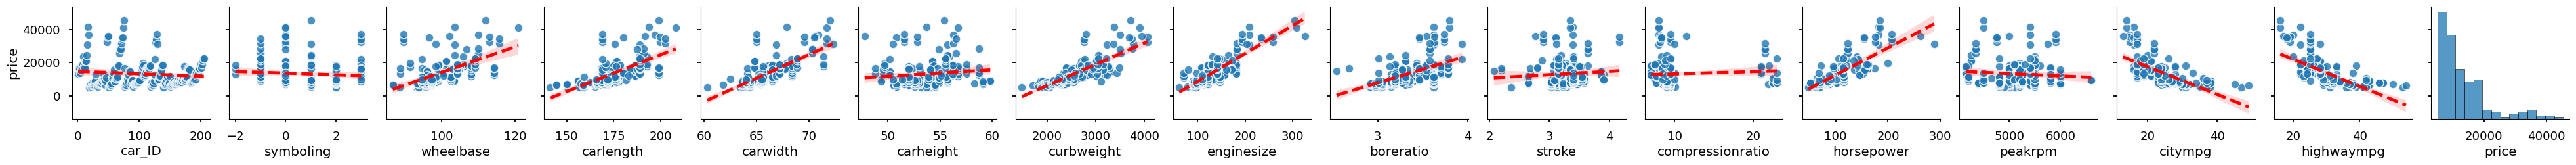

In [40]:
# Make a pairplot with regression lines
sns.pairplot(df, y_vars='price', kind='reg'[:5],
            plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                         scatter_kws={'edgecolor':'white', 'lw':1}));

## Checking for the Assumption of Little-to-No Multicollinearity

In [41]:
# Calc abs values of correlation
corr = df.drop(columns='price').corr().abs()
corr

C:\Users\amber\AppData\Local\Temp\ipykernel_12316\266807011.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(columns='price').corr().abs()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,1.000000,0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,0.033930,0.260064,0.160824,0.150276,0.015006,0.203789,0.015940,0.011255
symboling,0.151621,1.000000,0.531954,0.357612,0.232919,0.541038,0.227691,0.105790,0.130051,0.008735,0.178515,0.070873,0.273606,0.035823,0.034606
wheelbase,0.129729,0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,0.360469,0.470414,0.544082
carlength,0.170636,0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,0.287242,0.670909,0.704662
carwidth,0.052387,0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,0.220012,0.642704,0.677218
carheight,0.255960,0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,0.055307,0.261214,0.108802,0.320411,0.048640,0.107358
curbweight,0.071962,0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,0.266243,0.757414,0.797465
enginesize,0.033930,0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,0.244660,0.653658,0.677470
boreratio,0.260064,0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,0.055909,0.005197,0.573677,0.254976,0.584532,0.587012
stroke,0.160824,0.008735,0.160959,0.129533,0.182942,0.055307,0.168790,0.203129,0.055909,1.000000,0.186110,0.080940,0.067964,0.042145,0.043931


C:\Users\amber\AppData\Local\Temp\ipykernel_12316\2927026083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(columns='price').corr().abs()


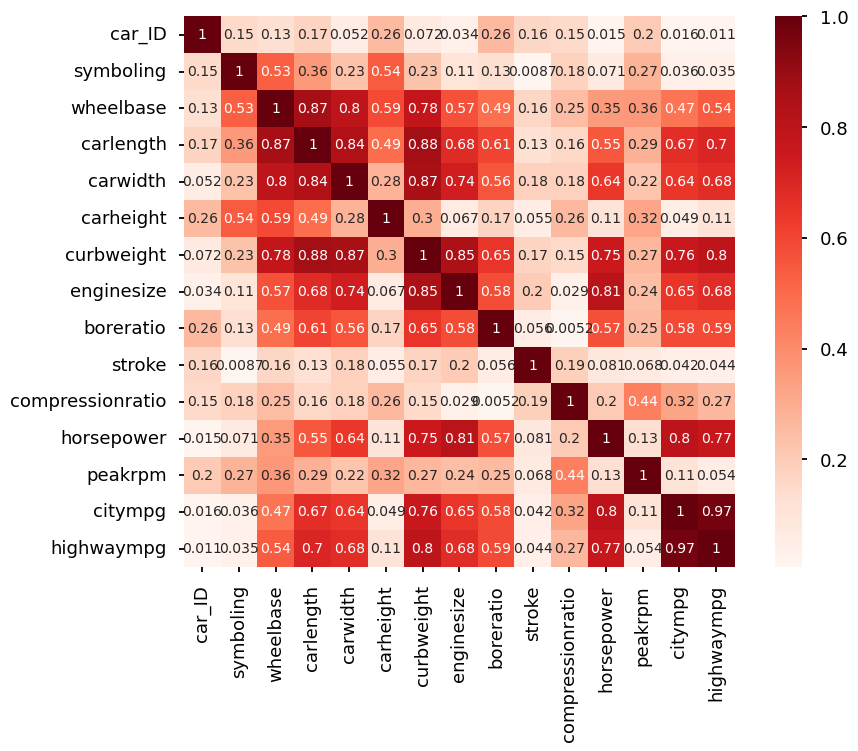

In [42]:
corr = df.drop(columns='price').corr().abs()
sns.heatmap(corr, square=True, cmap='Reds', annot=True);

C:\Users\amber\AppData\Local\Temp\ipykernel_12316\33453134.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(columns='price').corr().abs()


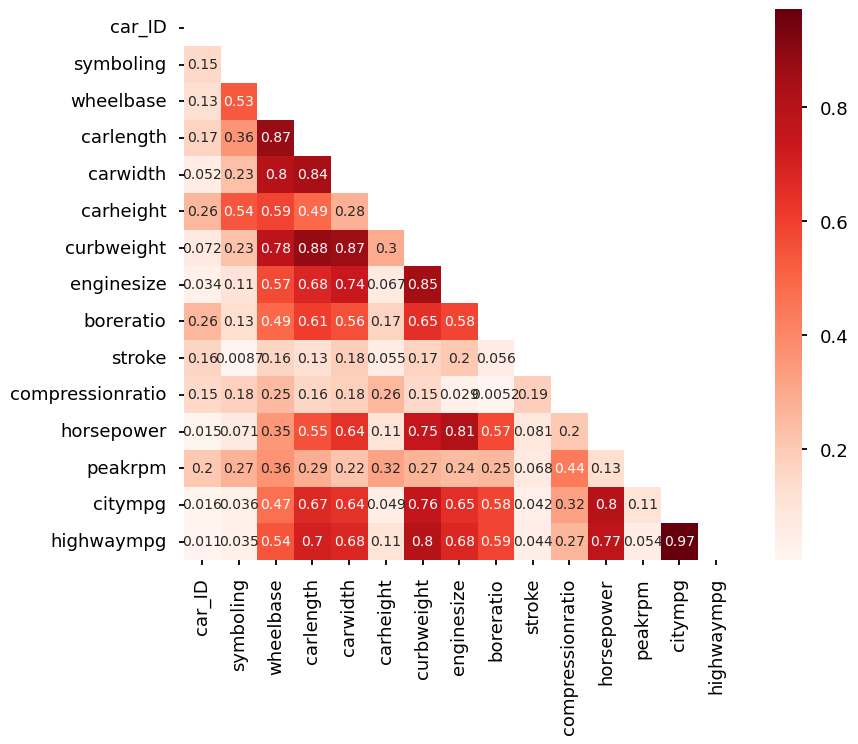

In [43]:
# Calculating the mask to hide the upper-right of the triangle
corr = df.drop(columns='price').corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, square=True, cmap='Reds', annot=True, mask=mask);

## Identifying Correlated Features to Drop

C:\Users\amber\AppData\Local\Temp\ipykernel_12316\2372094733.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().abs()


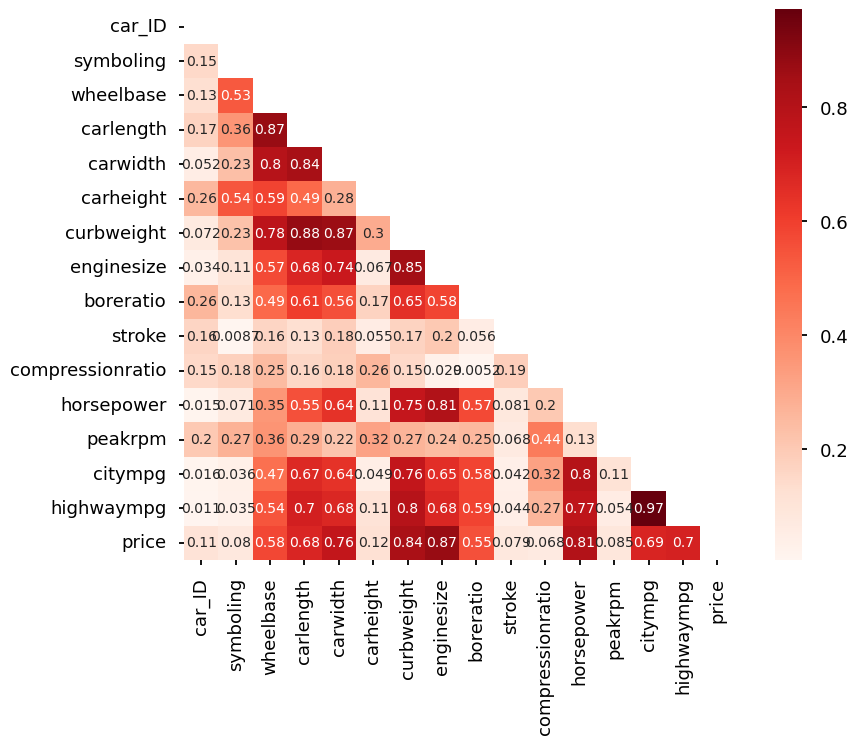

In [44]:
# Adding price back to the correlation heatmap
corr = df.corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, square=True, cmap='Reds', annot=True, mask=mask);

In [45]:
# Dropping the column showing high correlation
df = df.drop(columns=['carwidth', 'carlength', 'wheelbase', 'curbweight', 'enginesize', 'highwaympg', 'horsepower', 'citympg'])

C:\Users\amber\AppData\Local\Temp\ipykernel_12316\3475832536.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(columns='price').corr().abs()


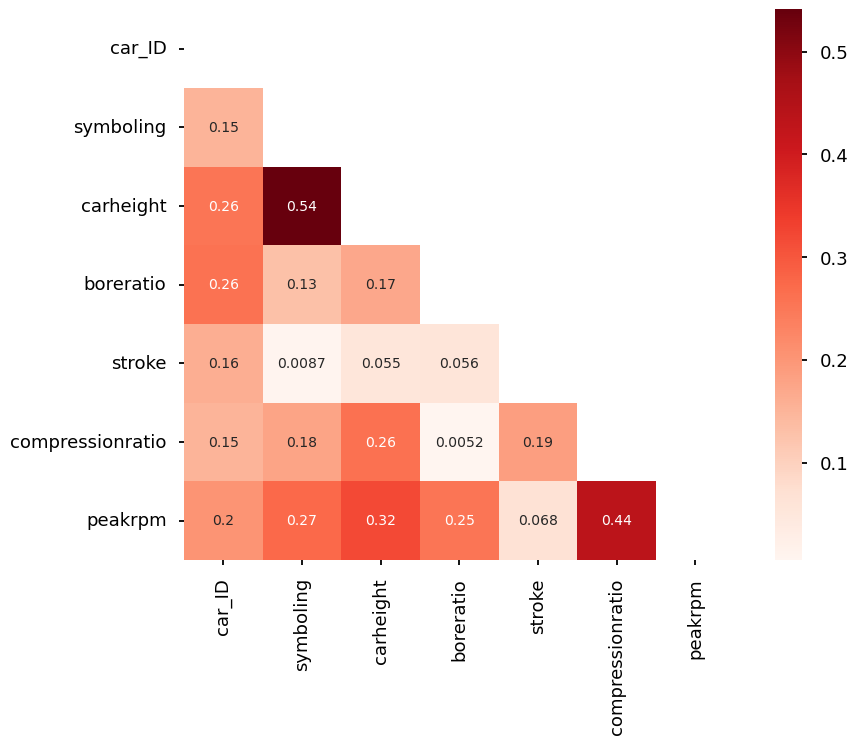

In [46]:
# Final check for multicollinearity via correlation
corr = df.drop(columns='price').corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, square=True, cmap='Reds', annot=True, mask=mask);

## Preprocess for Modeling

In [47]:
# Make x and y variables
y = df['price'].copy()
X = df.drop(columns=['price']).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=321)
X_train.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,peakrpm
17,18,0,bmw x3,gas,std,four,sedan,rwd,front,56.3,ohc,six,mpfi,3.62,3.39,8.0,5400
39,40,0,honda prelude,gas,std,four,sedan,fwd,front,54.1,ohc,four,1bbl,3.15,3.58,9.0,5800
40,41,0,honda accord,gas,std,four,sedan,fwd,front,54.1,ohc,four,1bbl,3.15,3.58,9.0,5800
47,48,0,jaguar xj,gas,std,four,sedan,rwd,front,52.8,dohc,six,mpfi,3.63,4.17,8.1,4750
123,124,-1,plymouth valiant,gas,std,four,wagon,fwd,front,59.8,ohc,four,2bbl,3.35,3.46,8.5,5000


In [48]:
# Make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [49]:
# Make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
# Make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False)
                        )
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))
preprocessor = make_column_transformer( (num_pipe, num_cols),
                                       (cat_pipe,cat_cols),
                                       remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['car_ID', 'symboling', 'carheight',
                                  'boreratio', 'stroke', 'compressionratio',
                                  'peakrpm']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['CarName', 'fueltype', 'aspiration',
                                  'doornumber', 'carbody', 'drivewheel',
                                  'enginelocation', 'enginetype',
                                  'cylindernumber', 'fuelsystem'])])

In [50]:
# Fit the col transformer to learn feature names 
preprocessor.fit(X_train)
# Now create list of our final features after preprocessing
final_features = []
# Adding the numeric features which process first in the Col Trans
final_features.extend(num_cols)
# Now, get OHe feature names
cat_features = preprocessor.named_transformers_['pipeline-2'][-1].get_feature_names_out(cat_cols)
final_features.extend(cat_features)
# Transform X vars and remake as dataframes
X_train_df = pd.DataFrame( preprocessor.transform(X_train), 
                         columns=final_features, 
                         index=X_train.index)
X_test_df = pd.DataFrame( preprocessor.transform(X_test), 
                         columns=final_features, 
                         index=X_test.index)
X_test_df.head()

C:\Users\amber\anaconda3\envs\dojo-env\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,car_ID,symboling,carheight,boreratio,stroke,compressionratio,peakrpm,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
48,49.0,0.0,52.8,3.63,4.17,8.1,4750.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
196,197.0,-2.0,56.2,3.78,3.15,9.5,5400.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
148,149.0,0.0,54.9,3.62,2.64,9.0,4800.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
53,54.0,1.0,54.1,3.03,3.15,9.0,5000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99,100.0,0.0,54.7,3.33,3.47,8.5,5200.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
# Adding constants for statsmodels
X_train_df = sm.add_constant(X_train_df, prepend=False)
X_test_df = sm.add_constant(X_test_df, prepend=False)
X_train_df.head(2)

,car_ID,symboling,carheight,boreratio,stroke,compressionratio,peakrpm,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
17,18.0,0.0,56.3,3.62,3.39,8.0,5400.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39,40.0,0.0,54.1,3.15,3.58,9.0,5800.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Fitting the Regression Model

In [52]:
# Make & fit a statmsodels OLS
model = sm.OLS(y_train, X_train_df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     12.42
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           1.27e-06
Time:                        22:05:48   Log-Likelihood:                -1223.1
No. Observations:                 153   AIC:                             2722.
Df Residuals:                      15   BIC:                             3140.
Df Model:                         137                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

## Finding the Model Residuals

In [53]:
# To get our residuals from statsmodels and preview first 5
resid = result.resid
resid.head()

17     2.136354e+03
39    -9.534233e-08
40    -2.329841e+02
47    -1.033186e-08
123    2.249180e-08
dtype: float64

## Checking the Assumption of Normality with Q-Q Plots

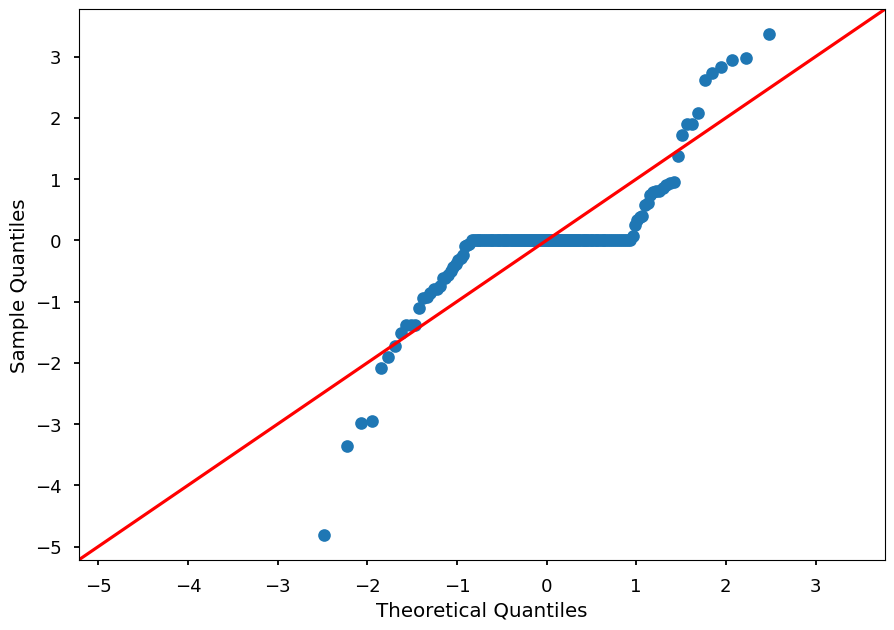

In [54]:
sm.graphics.qqplot(resid, line='45', fit=True);

## Checking Assumption of Homoscedasticity

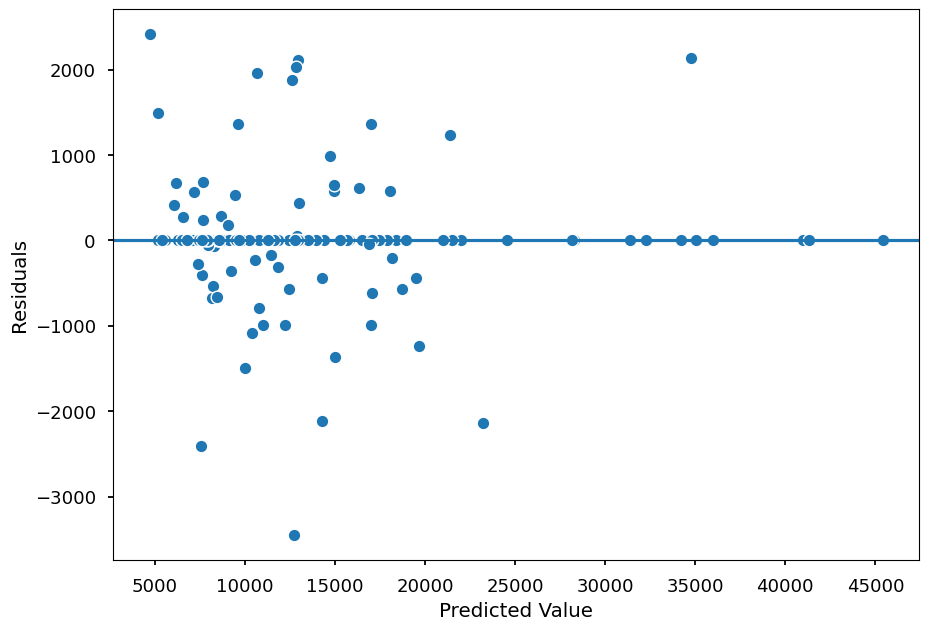

In [55]:
# Get predictions and calculate residuals
y_pred = result.predict(X_train_df)
resid = y_train - y_pred
# Plot predictions vs resids
fig, ax = plt.subplots()
ax.scatter(y_pred, resid, ec='white', lw=1)
ax.axhline(0)
ax.set(ylabel='Residuals', xlabel='Predicted Value');

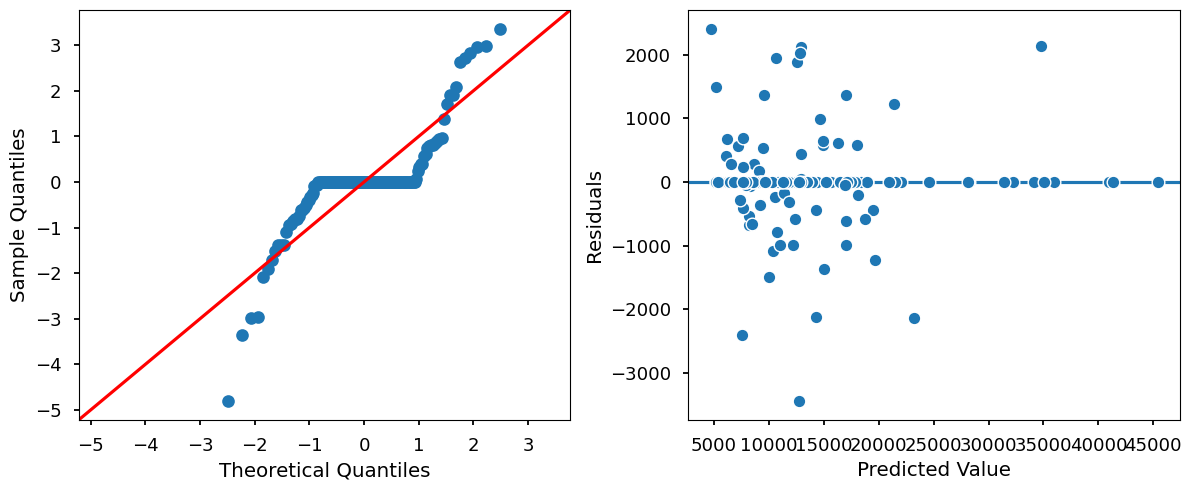

In [56]:
def evaluate_ols(result,X_train_df, y_train):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    
    # Save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    # Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    # Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()
    
evaluate_ols(result,X_train_df, y_train)

## Iterating on the Model


In [57]:
scaler = StandardScaler()
z_price = scaler.fit_transform(y_train.values.reshape(-1,1))
z_price

array([[ 3.10591049],
       [-0.54747299],
       [-0.35851611],
       [ 2.50255164],
       [-0.53756904],
       [ 0.69039003],
       [-0.97399427],
       [-0.7228771 ],
       [-0.86909063],
       [-0.30599913],
       [-0.82804137],
       [-1.02312306],
       [ 0.10605718],
       [-0.23432583],
       [-0.74946137],
       [-0.59256201],
       [ 0.76545152],
       [ 0.7817409 ],
       [-0.39852284],
       [-0.39761064],
       [ 0.69755736],
       [ 1.16916766],
       [ 0.02004922],
       [ 0.72635699],
       [-0.0543607 ],
       [-0.49091624],
       [-0.97399427],
       [-0.31942159],
       [-0.45716463],
       [-0.70854244],
       [ 0.50547292],
       [ 0.18802537],
       [-0.40217167],
       [-0.85462565],
       [-0.35200036],
       [-0.66319279],
       [-0.11417532],
       [ 0.6651089 ],
       [ 2.75458101],
       [ 0.04806696],
       [-0.53405054],
       [-0.40230198],
       [ 0.38467083],
       [-0.62657425],
       [ 0.17629701],
       [-1

In [58]:
z_price = pd.Series(z_price.flatten(),index=y_train.index )
z_price

17     3.105910
39    -0.547473
40    -0.358516
47     2.502552
123   -0.537569
         ...   
200    0.495048
41    -0.013181
31    -0.806800
124   -0.036768
26    -0.708542
Length: 153, dtype: float64

In [59]:
# Saving the true/false result as our outlier index
idx_outliers= z_price>3
idx_outliers

17      True
39     False
40     False
47     False
123    False
       ...  
200    False
41     False
31     False
124    False
26     False
Length: 153, dtype: bool

In [60]:
# How many outliers did we find?
idx_outliers.sum()

4

In [61]:
# Saving a cleaned version of y_train and X_train with outliers removed
y_train_cln = y_train[~idx_outliers]
X_train_cln = X_train_df[~idx_outliers]

In [62]:
print(f"Our model includes homes priced:")
print(f"- Greater than ${y_train_cln.min():,.2f}")
print(f"- Less than ${y_train_cln.max():,.2f}")

Our model includes homes priced:
- Greater than $5,118.00
- Less than $36,000.00


In [63]:
# Getting scaled y_test
z_price_test = scaler.transform(y_test.values.reshape(-1,1))
z_price_test = pd.Series(z_price_test.flatten(),index=y_test.index )
# Saving the true/false result as our outlier index
idx_outliers_test= z_price_test>3
# How many outleirs in test data?
idx_outliers_test.sum()

1

In [64]:
# Make clean version of X_test and y_test
X_test_cln = X_test_df[~idx_outliers_test] 
y_test_cln = y_test[~idx_outliers_test]

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     30.20
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           7.74e-09
Time:                        22:05:49   Log-Likelihood:                -1090.2
No. Observations:                 149   AIC:                             2450.
Df Residuals:                      14   BIC:                             2856.
Df Model:                         134                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

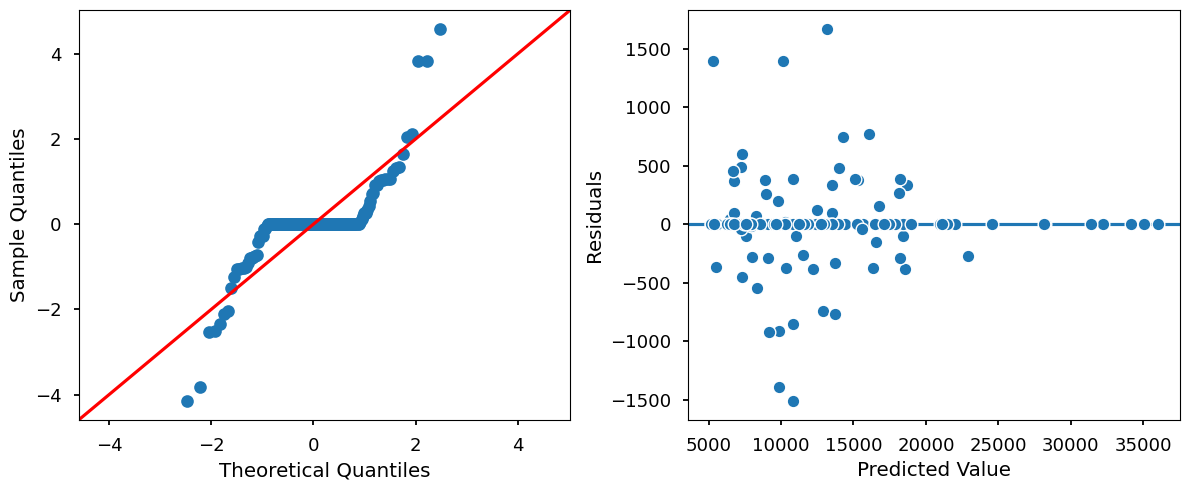

In [65]:
# Make & fit a statmsodels OLS
model = sm.OLS(y_train_cln,X_train_cln)
result = model.fit()
print(result.summary())
evaluate_ols(result,X_train_cln,y_train_cln)

In [66]:
# Save p-values
p_vals = result.pvalues
# Filter for p_values that are >.05
p_vals[p_vals>.05]

car_ID                        0.061411
carheight                     0.707510
boreratio                     0.304929
stroke                        0.076519
CarName_alfa-romero giulia    0.346534
                                ...   
fuelsystem_2bbl               0.093247
fuelsystem_4bbl               0.492257
fuelsystem_idi                0.295409
fuelsystem_mpfi               0.489203
fuelsystem_spfi               0.077363
Length: 101, dtype: float64

In [67]:
# How many CarName columns do we have overall? 
# Use a list comprehension to filter out columns that start with CarName
carname_cols = [col for col in X_train_df.columns if col.startswith('CarName')]
# Preview first few fuelsystem cols to confirm
carname_cols[:3]

['CarName_alfa-romero giulia',
 'CarName_alfa-romero stelvio',
 'CarName_audi 100 ls']

In [68]:
len(carname_cols)

116

In [69]:
# How many CarName coeffs are insig?
len(p_vals[p_vals>.05])

101

In [70]:
# Create a list of column names that start with 'CarName'
carname_cols = [col for col in X_train_df.columns if col.startswith('CarName')]

# Drop these columns from both training and testing dataframes
X_train_df = X_train_df.drop(columns=carname_cols)
X_test_df = X_test_df.drop(columns=carname_cols)

# Verify the updated dataframes
X_train_df.head()

,car_ID,symboling,carheight,boreratio,stroke,compressionratio,peakrpm,fueltype_diesel,fueltype_gas,aspiration_std,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
17,18.0,0.0,56.3,3.62,3.39,8.0,5400.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39,40.0,0.0,54.1,3.15,3.58,9.0,5800.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,41.0,0.0,54.1,3.15,3.58,9.0,5800.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,48.0,0.0,52.8,3.63,4.17,8.1,4750.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
123,124.0,-1.0,59.8,3.35,3.46,8.5,5000.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
X_test_df.head()

,car_ID,symboling,carheight,boreratio,stroke,compressionratio,peakrpm,fueltype_diesel,fueltype_gas,aspiration_std,...,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,const
48,49.0,0.0,52.8,3.63,4.17,8.1,4750.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
196,197.0,-2.0,56.2,3.78,3.15,9.5,5400.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
148,149.0,0.0,54.9,3.62,2.64,9.0,4800.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
53,54.0,1.0,54.1,3.03,3.15,9.0,5000.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99,100.0,0.0,54.7,3.33,3.47,8.5,5200.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [72]:
# Load Data
df = pd.read_csv("Data/CarPrice_Assignment.csv")
df = df.drop(columns = 'CarName')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [73]:
# Checking for null values
df.isna().sum()

car_ID              0
symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

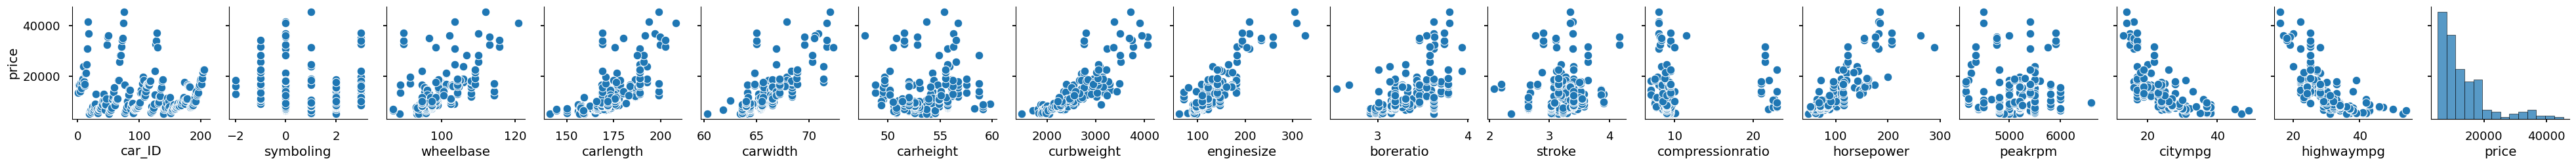

In [74]:
# Quick EDA for cols related to target (target = 'price')
sns.pairplot(df, y_vars='price');

In [75]:
# Make x and y variables
y = df['price'].copy()
X = df.drop(columns=['price']).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=321)
X_train.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
17,18,0,gas,std,four,sedan,rwd,front,110.0,197.0,...,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20
39,40,0,gas,std,four,sedan,fwd,front,96.5,175.4,...,four,110,1bbl,3.15,3.58,9.0,86,5800,27,33
40,41,0,gas,std,four,sedan,fwd,front,96.5,175.4,...,four,110,1bbl,3.15,3.58,9.0,86,5800,27,33
47,48,0,gas,std,four,sedan,rwd,front,113.0,199.6,...,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19
123,124,-1,gas,std,four,wagon,fwd,front,103.3,174.6,...,four,122,2bbl,3.35,3.46,8.5,88,5000,24,30


## Pipelines

In [76]:
# Make cat selector and use it to save a list of cat column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [77]:
len(cat_cols)

9

In [78]:
# Make num selector and use it to save a list of num column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [79]:
len(num_cols)

15

In [80]:
# Make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                      fill_value='MISSING'),
                        OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
preprocessor = make_column_transformer((cat_pipe, cat_cols), 
                                       (num_pipe, num_cols),
                                       remainder='passthrough')

## Remaking the DataFrame after ColumnTransformer

In [81]:
# Fit the col transformer
preprocessor.fit(X_train)

C:\Users\amber\anaconda3\envs\dojo-env\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['fueltype', 'aspiration', 'doornumber',
                                  'carbody', 'drivewheel', 'enginelocation',
                                  'enginetype', 'cylindernumber',
                                  'fuelsystem']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['car_ID', 'symboling', 'wheelbase',
                                  'carlength', 'carwidth', 'carheight',
                                  'curbweight', 'enginesize', 'boreratio',
                                  'stroke', 'compressionratio', 'horsepower',
                                  'peakrpm', 'citympg', 'highwaympg'])])

In [82]:
# Explore output of the transformation as a df
pd.DataFrame(preprocessor.transform(X_train).round(3))

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.078,1.856,1.946,1.104,0.376,-0.546,2.025,0.558,-1.533,-1.518
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.192,-0.489,-0.390,-0.678,0.992,-0.308,-0.461,1.363,0.259,0.318
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.192,-0.357,-0.390,-0.678,0.992,-0.308,-0.461,1.363,0.259,0.318
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.331,2.951,3.102,1.142,2.906,-0.523,1.870,-0.752,-1.533,-1.659
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.487,-0.038,-0.107,0.081,0.603,-0.427,-0.410,-0.248,-0.189,-0.105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.756,0.776,0.341,1.711,-0.402,-0.190,0.264,0.558,-0.339,-0.388
149,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.192,-0.175,-0.390,-0.678,0.992,-0.308,-0.073,1.363,-0.189,-0.388
150,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-1.136,-1.436,-0.815,-1.588,0.441,-0.261,-0.721,1.766,0.856,1.025
151,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-1.378,0.514,0.695,0.990,1.901,-0.784,1.067,-0.248,-0.936,-0.953


## Getting Feature Names

In [83]:
# Create an empty list of feature names
final_features = []

### Categorical Feature Names

In [84]:
# Finding the categorical pipeline in our col transformer
preprocessor.named_transformers_['pipeline-1']

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False,
                               sparse_output=False))])

In [85]:
# Using named steps dictionary to find the encoder - Part 1
preprocessor.named_transformers_['pipeline-1'].named_steps

{'simpleimputer': SimpleImputer(fill_value='MISSING', strategy='constant'),
 'onehotencoder': OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)}

In [86]:
# Using named steps dictionary to find the encoder - Part 2
ohe_step = preprocessor.named_transformers_['pipeline-1'].named_steps['onehotencoder']

In [87]:
# Get OHE feature names
cat_features = ohe_step.get_feature_names_out(cat_cols)
cat_features

array(['fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'doornumber_four', 'doornumber_two',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype=object)

In [88]:
# Add categorical feature names to our final_features list
final_features.extend(cat_features)
final_features

['fueltype_diesel',
 'fueltype_gas',
 'aspiration_std',
 'aspiration_turbo',
 'doornumber_four',
 'doornumber_two',
 'carbody_convertible',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'drivewheel_4wd',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginelocation_front',
 'enginetype_dohc',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'cylindernumber_eight',
 'cylindernumber_five',
 'cylindernumber_four',
 'cylindernumber_six',
 'cylindernumber_three',
 'cylindernumber_twelve',
 'cylindernumber_two',
 'fuelsystem_1bbl',
 'fuelsystem_2bbl',
 'fuelsystem_4bbl',
 'fuelsystem_idi',
 'fuelsystem_mfi',
 'fuelsystem_mpfi',
 'fuelsystem_spdi',
 'fuelsystem_spfi']

### Numerical Feature Names

In [89]:
# Confirm list of numeric features
num_cols

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [90]:
# Add the numeric features which were passed through the model
final_features.extend(num_cols)
final_features

['fueltype_diesel',
 'fueltype_gas',
 'aspiration_std',
 'aspiration_turbo',
 'doornumber_four',
 'doornumber_two',
 'carbody_convertible',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'drivewheel_4wd',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginelocation_front',
 'enginetype_dohc',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'cylindernumber_eight',
 'cylindernumber_five',
 'cylindernumber_four',
 'cylindernumber_six',
 'cylindernumber_three',
 'cylindernumber_twelve',
 'cylindernumber_two',
 'fuelsystem_1bbl',
 'fuelsystem_2bbl',
 'fuelsystem_4bbl',
 'fuelsystem_idi',
 'fuelsystem_mfi',
 'fuelsystem_mpfi',
 'fuelsystem_spdi',
 'fuelsystem_spfi',
 'car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

## Transforming X_train and X_test & Remaking DataFrames

In [91]:
# Transform X_train
X_train_df = pd.DataFrame(preprocessor.transform(X_train), columns=final_features,
                         index=X_train.index)
X_train_df.head()

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
17,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.078184,1.855775,1.945552,1.104185,0.376132,-0.546313,2.025098,0.557617,-1.532551,-1.517697
39,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.192373,-0.489363,-0.390498,-0.677725,0.992489,-0.308461,-0.461496,1.363430,0.258514,0.318495
40,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.192373,-0.356583,-0.390498,-0.677725,0.992489,-0.308461,-0.461496,1.363430,0.258514,0.318495
47,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.331061,2.951215,3.101778,1.142097,2.906440,-0.522527,1.869686,-0.751829,-1.532551,-1.658942
123,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.487430,-0.038300,-0.107341,0.080534,0.603211,-0.427387,-0.409692,-0.248196,-0.189252,-0.105242


In [92]:
# Transform X_test
X_test_df = pd.DataFrame(preprocessor.transform(X_test), columns=final_features,
                        index=X_test.index)
X_test_df.head()

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
48,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.331061,2.951215,3.101778,1.142097,2.906440,-0.522527,1.869686,-0.751829,-1.532551,-1.658942
196,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.037920,0.742762,0.340992,1.710792,-0.402424,-0.189535,0.263760,0.557617,-0.189252,-0.387733
148,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.514486,-0.262855,-0.437691,1.104185,-2.056855,-0.308461,-0.565104,-0.651102,-0.338507,-0.246487
53,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.192373,-1.190367,-0.838831,-1.132681,-0.402424,-0.308461,-0.927733,-0.248196,0.855536,1.024722
99,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.433958,-0.450310,-0.154534,0.004708,0.635651,-0.427387,-0.176574,0.154711,0.258514,0.459740


## Adding a Constant

In [93]:
# Standard Statsmodels Import
import statsmodels.api as sm

In [94]:
# Overwrite our X dataframes to include the constant
X_train_df = sm.add_constant(X_train_df, has_constant='add', prepend=False)
X_test_df = sm.add_constant(X_test_df, has_constant='add', prepend=False)
display(X_train_df.head(2), X_test_df.head(2))

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,const
17,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.855775,1.945552,1.104185,0.376132,-0.546313,2.025098,0.557617,-1.532551,-1.517697,1.0
39,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.489363,-0.390498,-0.677725,0.992489,-0.308461,-0.461496,1.363430,0.258514,0.318495,1.0


,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,const
48,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,2.951215,3.101778,1.142097,2.906440,-0.522527,1.869686,-0.751829,-1.532551,-1.658942,1.0
196,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.742762,0.340992,1.710792,-0.402424,-0.189535,0.263760,0.557617,-0.189252,-0.387733,1.0


## Fit to a LinearRegression in sklearn

In [95]:
# LinearRegression import
from sklearn.linear_model import LinearRegression

In [96]:
# Instantiate the model
model = LinearRegression(fit_intercept=False)

In [97]:
# Fit the model
model.fit(X_train_df, y_train)

LinearRegression(fit_intercept=False)

In [98]:
# Define predictions
train_preds = model.predict(X_train_df)
test_preds = model.predict(X_test_df)

In [99]:
# Import metrics
from sklearn.metrics import r2_score, mean_squared_error
# Find r-square
print('Training r2:', r2_score(y_train, train_preds))
print('Testing r2:', r2_score(y_test, test_preds))
# Find mse
print('Training MSE:', mean_squared_error(y_train, train_preds))
print('Testing MSE:', mean_squared_error(y_test, test_preds))

Training r2: 0.9382566277385276
Testing r2: -5.515312133928583e+23
Training MSE: 3635808.0383783593
Testing MSE: 4.219264109698985e+31


## Fitting an OLS in statsmodels

In [100]:
# Instantiate an OLS model with the training data
model = sm.OLS(y_train, X_train_df, hasconst=True)

In [101]:
# Fitting the model and saving the result as a new var
result = model.fit()

In [102]:
# Get model performance metrics
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     42.80
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           1.43e-51
Time:                        22:05:52   Log-Likelihood:                -1369.9
No. Observations:                 153   AIC:                             2824.
Df Residuals:                     111   BIC:                             2951.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
fueltype_diesel        5036.3832   2916.472      1.727      0.087    -742.801    1.08e+04
fueltype_gas          -1262.8039   2376.015     -0.531      0.596   -5971.037    3445.429
aspiration_std          751.7823    580.948      1.294      0.198    -399.406    1902.970
aspiration_turbo       3021.7970    586.595      5.151      0.000    1859.420    4184.174
doornumber_four        2056.7428    513.190      4.008      0.000    1039.822    3073.663
doornumber_two         1716.8365    459.298      3.738      0.000     806.706    2626.967
carbody_convertible    2613.5810   1355.050      1.929      0.056     -71.541    5298.703
carbody_hardtop        1437.9211   1039.368      1.383      0.169    -621.655    3497.497
carbody_hatchback        55.5324    543.808      0.102      0.919   -1022.060    1133.124
carbody_sedan           394.0612    596.380      0.661      0.510    -787.705    1575.827
carbody_wagon          -727.5164    855.348     -0.851      0.397   -2422.446     967.413
drivewheel_4wd         1137.3449    893.542      1.273      0.206    -633.269    2907.959
drivewheel_fwd         1028.8884    584.255      1.761      0.081    -128.853    2186.629
drivewheel_rwd         1607.3461    754.023      2.132      0.035     113.199    3101.493
enginelocation_front   3773.5793    645.867      5.843      0.000    2493.751    5053.407
enginetype_dohc        2342.5906   1209.086      1.937      0.055     -53.293    4738.474
enginetype_dohcv      -4971.0965   4302.442     -1.155      0.250   -1.35e+04    3554.480
enginetype_l           -219.4135   1901.455     -0.115      0.908   -3987.274    3548.447
enginetype_ohc         5199.1437   1111.803      4.676      0.000    2996.033    7402.255
enginetype_ohcf        2135.3551   1633.885      1.307      0.194   -1102.297    5373.007
enginetype_ohcv       -3828.5235   1284.686     -2.980      0.004   -6374.214   -1282.833
enginetype_rotor       3115.5234   1420.766      2.193      0.030     300.181    5930.866
cylindernumber_eight   7281.3690   2304.209      3.160      0.002    2715.425    1.18e+04
cylindernumber_five   -5130.0152   1664.517     -3.082      0.003   -8428.366   -1831.664
cylindernumber_four   -5045.8764   1661.335     -3.037      0.003   -8337.923   -1753.830
cylindernumber_six     -210.9585    950.931     -0.222      0.825   -2095.291    1673.374
cylindernumber_three   4000.0028   3187.249      1.255      0.212   -2315.745    1.03e+04
cylindernumber_twelve  -236.4657   4768.816     -0.050      0.961   -9686.193    9213.262
cylindernumber_two     3115.5234   1420.766      2.193      0.030     300.181    5930.866
fuelsystem_1bbl         472.9268   1108.969      0.426      0.671   -1724.569    2670.423
fuelsystem_2bbl        1077.5974    791.534      1.361      0.176    -490.880    2646.075
fuelsystem_4bbl        

In [103]:
# Use the result to .predict
test_preds = result.predict(X_test_df)

In [104]:
test_r2 = r2_score(y_test, test_preds)
test_mse = mean_squared_error(y_test, test_preds)

In [105]:
print(f'The testing r-square value is {test_r2} and the testing mean squared error is {test_mse}.')

The testing r-square value is 0.8452096718186125 and the testing mean squared error is 11841601.352107855.


In [106]:
# Making the print statement fancier
print(f'Our testing r-squared value is only displaying 2 decimal places and is {test_r2:.2f}.')
print(f'Our testing mean squared error is only displaying 2 decimal places and is {test_mse:.2f}.')

Our testing r-squared value is only displaying 2 decimal places and is 0.85.
Our testing mean squared error is only displaying 2 decimal places and is 11841601.35.


# Diagnosing Your Regression Model (Practice)


In [107]:
## Standard Statsmodels import
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
plt.rcParams['figure.facecolor'] = 'white'
plt.style.use(['seaborn-talk'])
# pd.set_option('display.max_columns',25)

C:\Users\amber\AppData\Local\Temp\ipykernel_12316\2090592943.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-talk'])


## Checking for the Assumption of Linearity

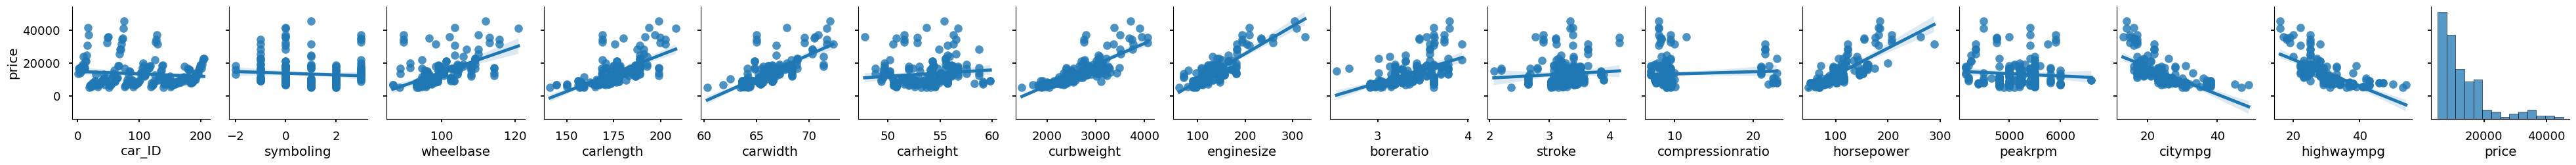

In [108]:
sns.pairplot(df, y_vars='price', kind='reg');

In [109]:
plot_kws = dict(line_kws={'color':'red', 'ls':'--'},
               scatter_kws={'edgecolor':'white', 'lw':1})

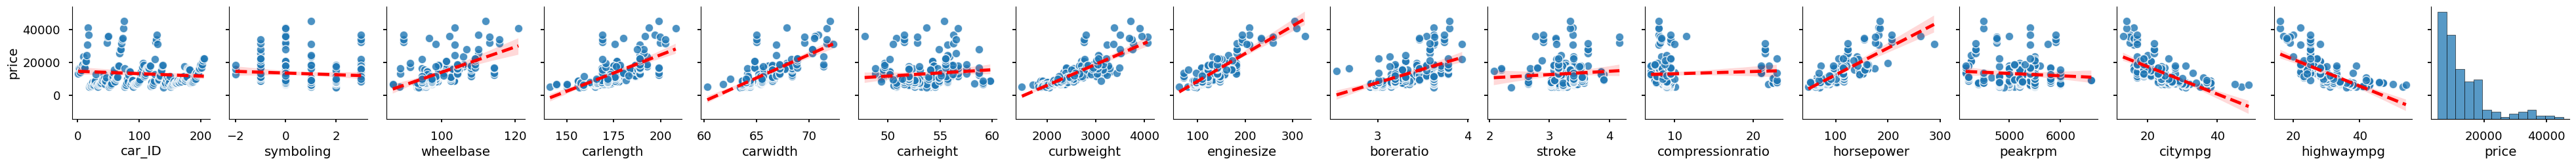

In [110]:
# Make a pairplot with regression lines
sns.pairplot(df, y_vars='price', kind='reg'[:5],
            plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                         scatter_kws={'edgecolor':'white', 'lw':1}));

## Checking for the Assumption of Little-to-No Multicollinearity

In [111]:
# Calc abs values of correlation
corr = df.drop(columns='price').corr().abs()
corr

C:\Users\amber\AppData\Local\Temp\ipykernel_12316\266807011.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(columns='price').corr().abs()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,1.000000,0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,0.033930,0.260064,0.160824,0.150276,0.015006,0.203789,0.015940,0.011255
symboling,0.151621,1.000000,0.531954,0.357612,0.232919,0.541038,0.227691,0.105790,0.130051,0.008735,0.178515,0.070873,0.273606,0.035823,0.034606
wheelbase,0.129729,0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,0.360469,0.470414,0.544082
carlength,0.170636,0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,0.287242,0.670909,0.704662
carwidth,0.052387,0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,0.220012,0.642704,0.677218
carheight,0.255960,0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,0.055307,0.261214,0.108802,0.320411,0.048640,0.107358
curbweight,0.071962,0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,0.266243,0.757414,0.797465
enginesize,0.033930,0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,0.244660,0.653658,0.677470
boreratio,0.260064,0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,0.055909,0.005197,0.573677,0.254976,0.584532,0.587012
stroke,0.160824,0.008735,0.160959,0.129533,0.182942,0.055307,0.168790,0.203129,0.055909,1.000000,0.186110,0.080940,0.067964,0.042145,0.043931


C:\Users\amber\AppData\Local\Temp\ipykernel_12316\2927026083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(columns='price').corr().abs()


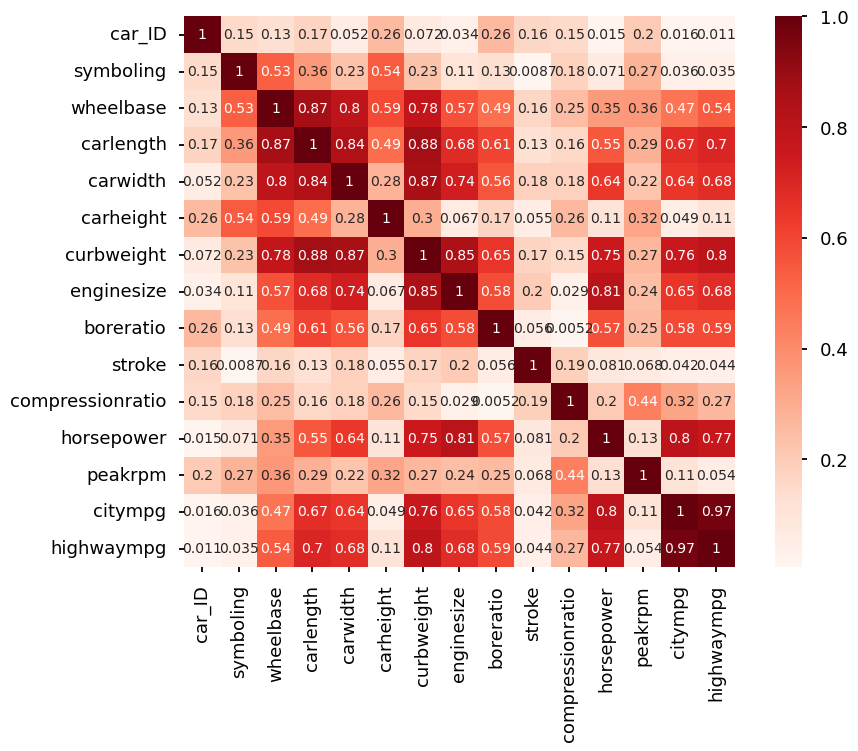

In [112]:
corr = df.drop(columns='price').corr().abs()
sns.heatmap(corr, square=True, cmap='Reds', annot=True);

C:\Users\amber\AppData\Local\Temp\ipykernel_12316\33453134.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(columns='price').corr().abs()


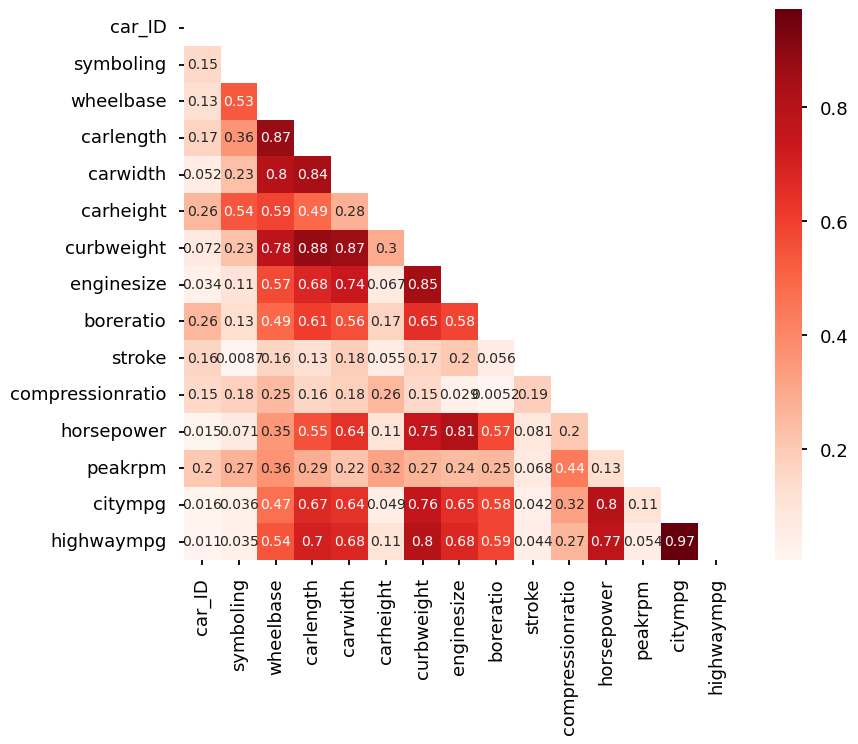

In [113]:
# Calculating the mask to hide the upper-right of the triangle
corr = df.drop(columns='price').corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, square=True, cmap='Reds', annot=True, mask=mask);

## Identifying Correlated Features to Drop

C:\Users\amber\AppData\Local\Temp\ipykernel_12316\2372094733.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().abs()


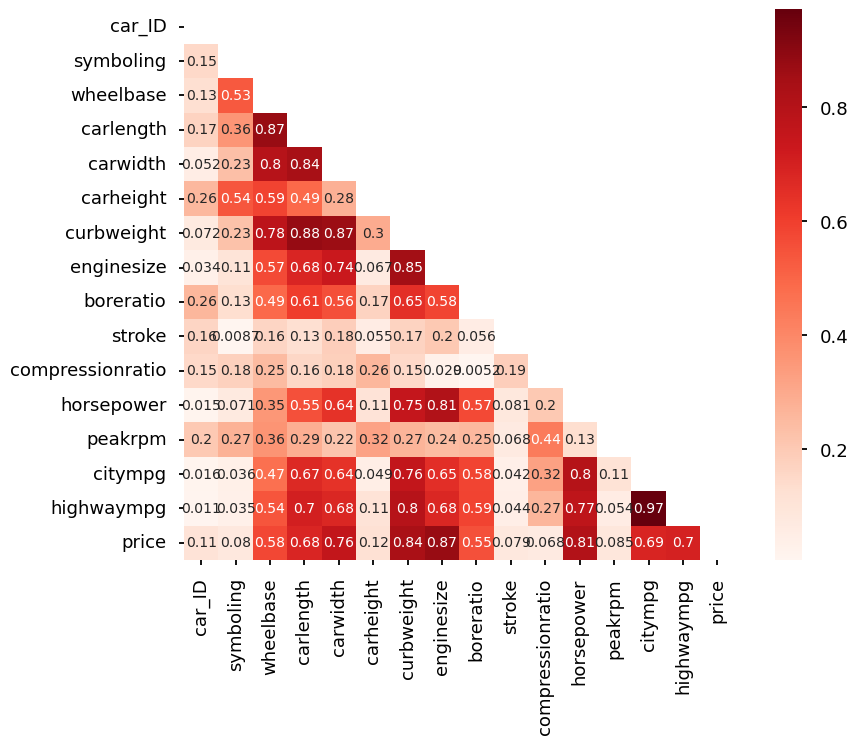

In [114]:
# Adding price back to the correlation heatmap
corr = df.corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, square=True, cmap='Reds', annot=True, mask=mask);

In [115]:
# Dropping the column showing high correlation
df = df.drop(columns=['carwidth', 'carlength', 'wheelbase', 'curbweight', 'enginesize', 'highwaympg', 'horsepower', 'citympg'])

C:\Users\amber\AppData\Local\Temp\ipykernel_12316\3475832536.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(columns='price').corr().abs()


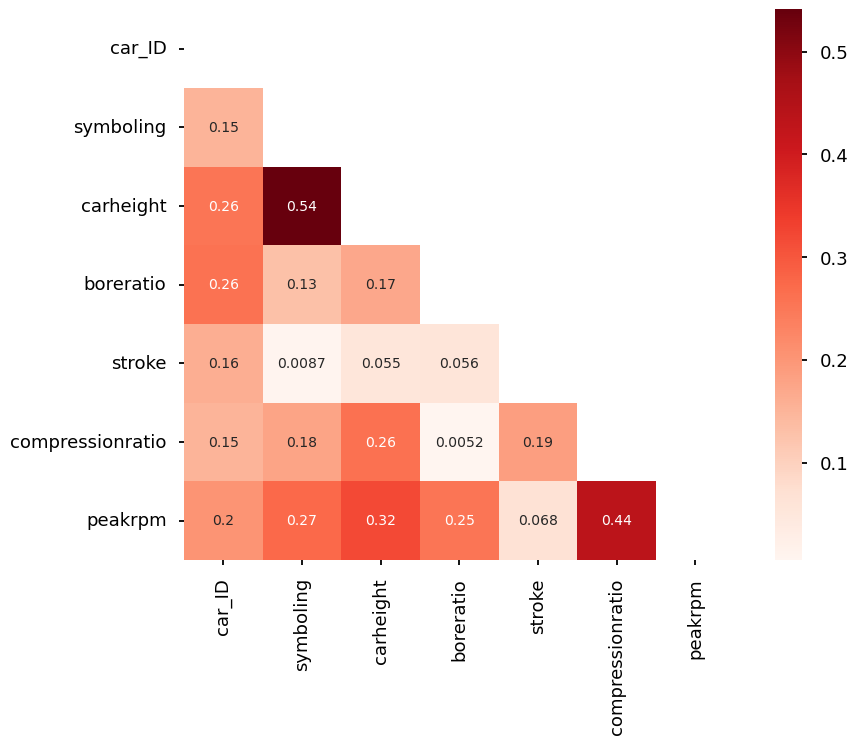

In [116]:
# Final check for multicollinearity via correlation
corr = df.drop(columns='price').corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, square=True, cmap='Reds', annot=True, mask=mask);

## Preprocess for Modeling

In [117]:
# Make x and y variables
y = df['price'].copy()
X = df.drop(columns=['price']).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=321)
X_train.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,peakrpm
17,18,0,gas,std,four,sedan,rwd,front,56.3,ohc,six,mpfi,3.62,3.39,8.0,5400
39,40,0,gas,std,four,sedan,fwd,front,54.1,ohc,four,1bbl,3.15,3.58,9.0,5800
40,41,0,gas,std,four,sedan,fwd,front,54.1,ohc,four,1bbl,3.15,3.58,9.0,5800
47,48,0,gas,std,four,sedan,rwd,front,52.8,dohc,six,mpfi,3.63,4.17,8.1,4750
123,124,-1,gas,std,four,wagon,fwd,front,59.8,ohc,four,2bbl,3.35,3.46,8.5,5000


In [118]:
# Make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [119]:
# Make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
# Make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False)
                        )
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))
preprocessor = make_column_transformer( (num_pipe, num_cols),
                                       (cat_pipe,cat_cols),
                                       remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['car_ID', 'symboling', 'carheight',
                                  'boreratio', 'stroke', 'compressionratio',
                                  'peakrpm']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['fueltype', 'aspiration', 'doornumber',
                                  'carbody', 'drivewheel', 'enginelocation',
                                  'enginetype', 'cylindernumber',
                                  'fuelsystem'])])

In [120]:
# Fit the col transformer to learn feature names 
preprocessor.fit(X_train)
# Now create list of our final features after preprocessing
final_features = []
# Adding the numeric features which process first in the Col Trans
final_features.extend(num_cols)
# Now, get OHe feature names
cat_features = preprocessor.named_transformers_['pipeline-2'][-1].get_feature_names_out(cat_cols)
final_features.extend(cat_features)
# Transform X vars and remake as dataframes
X_train_df = pd.DataFrame( preprocessor.transform(X_train), 
                         columns=final_features, 
                         index=X_train.index)
X_test_df = pd.DataFrame( preprocessor.transform(X_test), 
                         columns=final_features, 
                         index=X_test.index)
X_test_df.head()

C:\Users\amber\anaconda3\envs\dojo-env\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,car_ID,symboling,carheight,boreratio,stroke,compressionratio,peakrpm,fueltype_diesel,fueltype_gas,aspiration_std,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
48,49.0,0.0,52.8,3.63,4.17,8.1,4750.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
196,197.0,-2.0,56.2,3.78,3.15,9.5,5400.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
148,149.0,0.0,54.9,3.62,2.64,9.0,4800.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
53,54.0,1.0,54.1,3.03,3.15,9.0,5000.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99,100.0,0.0,54.7,3.33,3.47,8.5,5200.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
# Adding constants for statsmodels
X_train_df = sm.add_constant(X_train_df, prepend=False)
X_test_df = sm.add_constant(X_test_df, prepend=False)
X_train_df.head(2)

,car_ID,symboling,carheight,boreratio,stroke,compressionratio,peakrpm,fueltype_diesel,fueltype_gas,aspiration_std,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
17,18.0,0.0,56.3,3.62,3.39,8.0,5400.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39,40.0,0.0,54.1,3.15,3.58,9.0,5800.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Fitting the Regression Model

In [122]:
# Make & fit a statmsodels OLS
model = sm.OLS(y_train, X_train_df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     32.42
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           3.00e-45
Time:                        22:06:11   Log-Likelihood:                -1409.7
No. Observations:                 153   AIC:                             2887.
Df Residuals:                     119   BIC:                             2990.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
car_ID                  -16.88

## Finding the Model Residuals

In [123]:
# To get our residuals from statsmodels and preview first 5
resid = result.resid
resid.head()

17     4607.205215
39     -982.044675
40      484.838472
47     8201.223617
123   -1359.314752
dtype: float64

## Checking the Assumption of Normality with Q-Q Plots

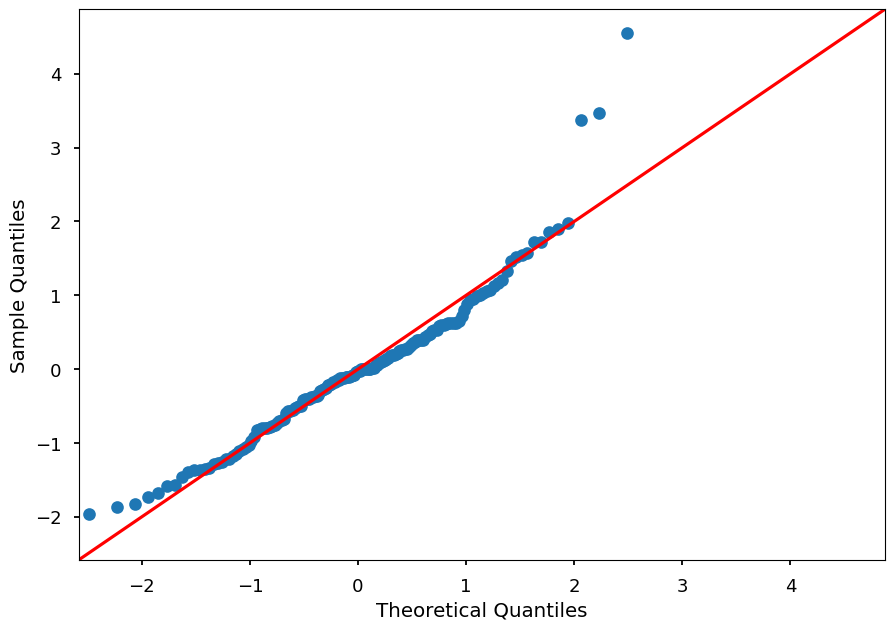

In [124]:
sm.graphics.qqplot(resid, line='45', fit=True);

## Checking Assumption of Homoscedasticity

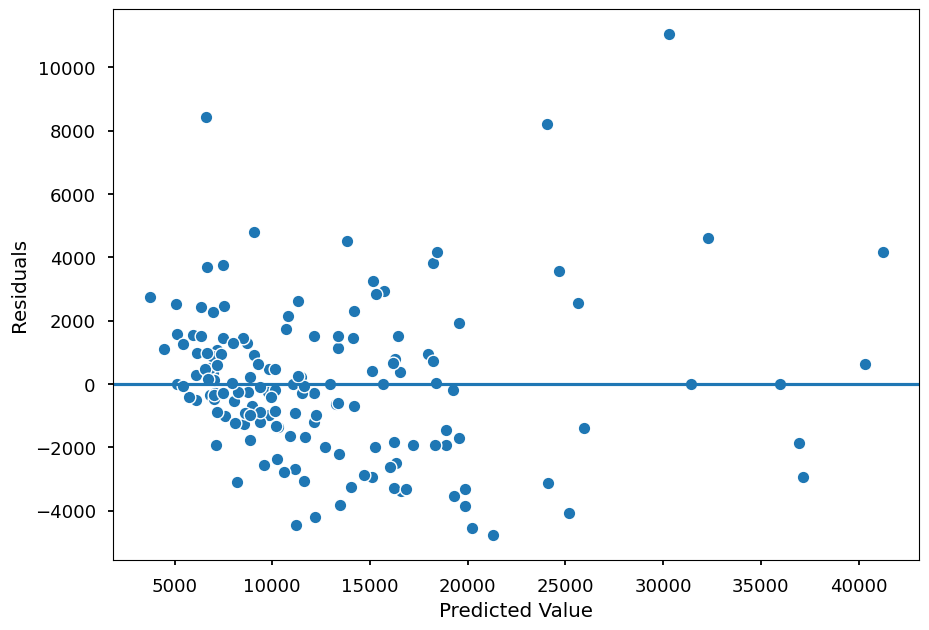

In [125]:
# Get predictions and calculate residuals
y_pred = result.predict(X_train_df)
resid = y_train - y_pred
# Plot predictions vs resids
fig, ax = plt.subplots()
ax.scatter(y_pred, resid, ec='white', lw=1)
ax.axhline(0)
ax.set(ylabel='Residuals', xlabel='Predicted Value');

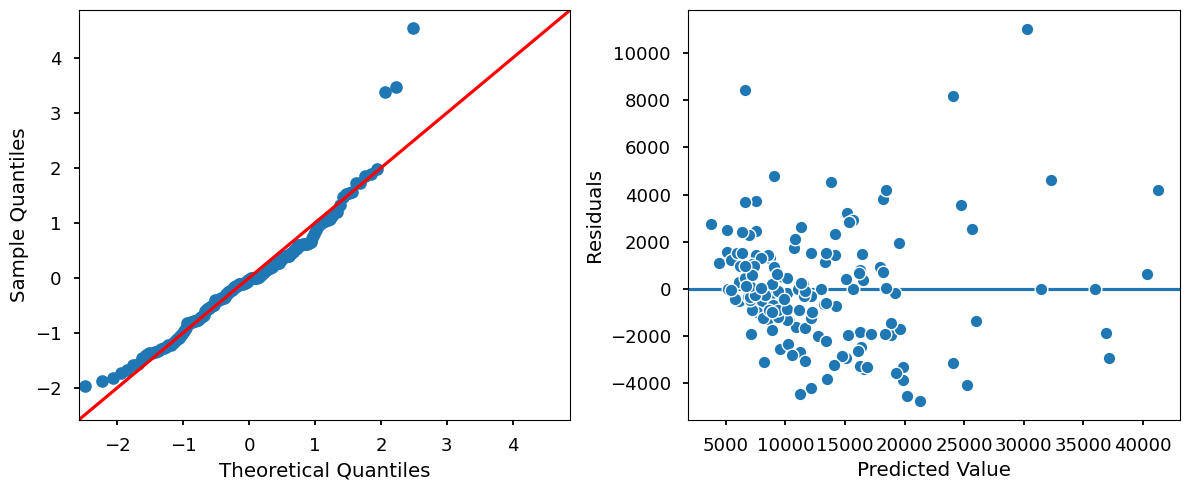

In [126]:
def evaluate_ols(result,X_train_df, y_train):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    
    # Save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    # Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    # Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()
    
evaluate_ols(result,X_train_df, y_train)

## The assumptions that the model met are as follows:

1. Independence of features / little-to-no multicollinearity.
    - The remaining input features have a positive linear relationship with the target.

2. Assumption of Linearity/Linear Relationship of features to the target.
    - There were little to no data points that were strongly correlated to each other.

3. Assumption of Normality/Normally Distributed Residuals 
    - The model's residuals are as fairly distributed as is possible. There appear to only be 3 outliers.

4. Assumption of homoscedasticity - or equal variance across residuals.
    - The model's residuals also have a fairly equal variance across all predictions.